<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hydrogen molecule (H₂)**

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft
from pyscf.geomopt.geometric_solver import optimize

In [2]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''

# Name
molecule = 'Hydrogen (H₂)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.build()

In [4]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -1.12870009355644


np.float64(-1.1287000935564415)

converged SCF energy = -1.12870009355644


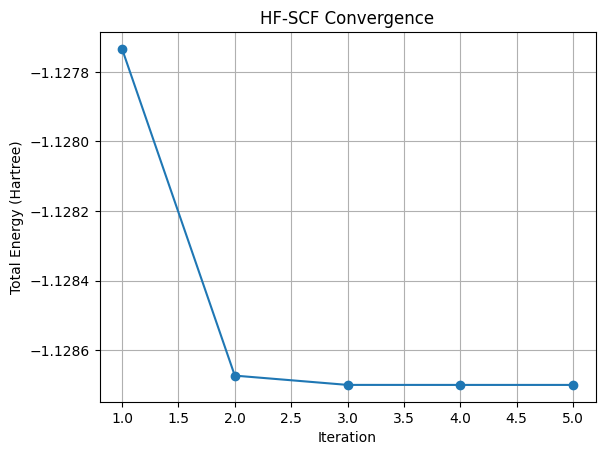

Ground state energy for Hydrogen (H₂): -1.1287000935564406 Hartree


In [5]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [7]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -1.17328112090857


np.float64(-1.1732811209085716)

In [8]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -1.12870009355644
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]

** Singlet excitation energies and oscillator strengths **
Excited State   1:     14.07567 eV     88.08 nm  f=0.6152
Excited State   2:     21.45479 eV     57.79 nm  f=0.0000
Excited State   3:     32.30709 eV     38.38 nm  f=0.2024


In [7]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-3f599ef5-8052-46a8-8edf-ffd02c650949.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.000000   0.740000    0.000000  0.000000  0.000000
converged SCF energy = -1.17328112089116
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000    -0.0000000000     0.0159964150
1 H    -0.0000000000     0.0000000000    -0.0159964150
----------------------------------------------
cycle 1: E = -1.17328112089  dE = -1.17328  norm(grad) = 0.0226223


Step    0 : Gradient = 1.600e-02/1.600e-02 (rms/max) Energy = -1.1732811209
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.91394e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.000000   0.000000  -0.010814   -0.000000  0.000000 -0.010814
   H   0.000000  -0.000000   0.750814    0.000000 -0.000000  0.010814
converged SCF energy = -1.17360206558998
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000664006
1 H     0.0000000000    -0.0000000000    -0.0000664006
----------------------------------------------
cycle 2: E = -1.17360206559  dE = -0.000320945  norm(grad) = 9.39047e-05


Step    1 : Displace = 1.081e-02/1.081e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 6.640e-05/6.640e-05 (rms/max) E (change) = -1.1736020656 (-3.209e-04) Quality = 0.982
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.000000  -0.000000  -0.010859   -0.000000 -0.000000 -0.000045
   H   0.000000   0.000000   0.750859   -0.000000  0.000000  0.000045
converged SCF energy = -1.17360207162442
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000045661
1 H    -0.0000000000     0.0000000000    -0.0000045661
----------------------------------------------
cycle 3: E = -1.17360207162  dE = -6.03444e-09  norm(grad) = 6.45747e-06


Step    2 : Displace = 4.507e-05/4.507e-05 (rms/max) Trust = 1.414e-01 (+) Grad = 4.566e-06/4.566e-06 (rms/max) E (change) = -1.1736020716 (-6.034e-09) Quality = 1.067
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.447 seconds


[[-1.21908345e-15 -1.67577959e-16 -2.05203498e-02]
 [ 7.36513360e-17  5.03596369e-16  1.41891768e+00]]


converged SCF energy = -1.12870009355644


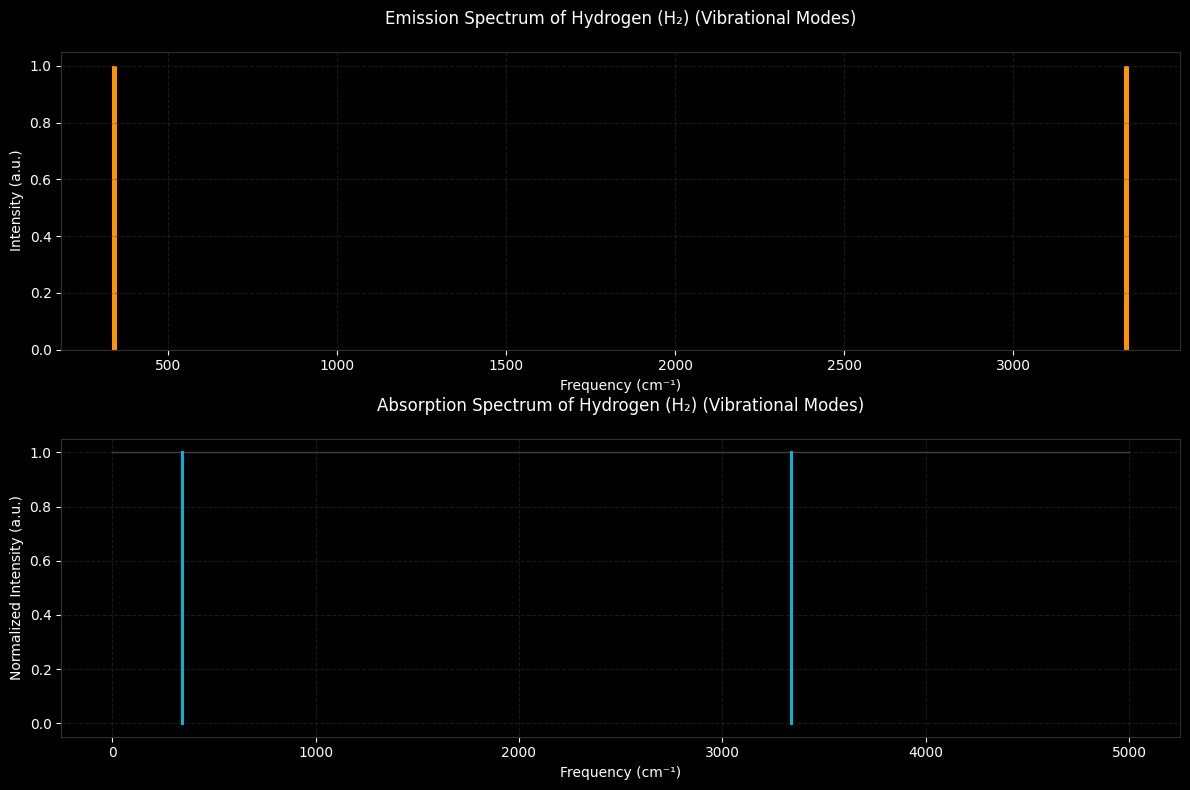

In [9]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid

# Step 1: Define the molecule ad basis
mol.atom = mol.atom
mol.basis = mol.basis
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Create figure with dark background
plt.figure(figsize=(12, 8), facecolor='black')
# Set the style to dark background
plt.style.use('dark_background')

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

**Appendix: Hydrogen Atom - Electronic Energy Levels and Emission / Absorption Lines**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 43.4 MB/s eta 0:00:00


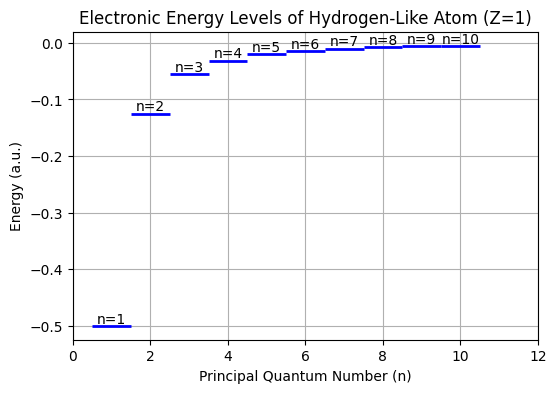

Energy levels (in atomic units):
n=1, Energy: -0.500000 a.u.
n=2, Energy: -0.125000 a.u.
n=3, Energy: -0.055556 a.u.
n=4, Energy: -0.031250 a.u.
n=5, Energy: -0.020000 a.u.
n=6, Energy: -0.013889 a.u.
n=7, Energy: -0.010204 a.u.
n=8, Energy: -0.007812 a.u.
n=9, Energy: -0.006173 a.u.
n=10, Energy: -0.005000 a.u.


In [ ]:
# Theoretical Electronic Energy Levels of Hydrogen

!pip install qutip -q
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, qeye, tensor, destroy

# Constants (in atomic units)
Z = 1  # Atomic number (Z = 1 for hydrogen, Z = 2 for helium, etc.)
n_max = 10  # Maximum principal quantum number

# Define the Hamiltonian for a hydrogen-like atom
def hydrogen_like_hamiltonian(Z, n_max):
    energies = []
    for n in range(1, n_max + 1):
        # Energy levels follow the formula: E_n = -Z^2 / (2 * n^2)
        energy_n = -Z**2 / (2 * n**2)
        energies.append(energy_n)
    return np.array(energies)

# Calculate the energy levels
energy_levels = hydrogen_like_hamiltonian(Z, n_max)

# Plot the energy levels (as lines)
plt.figure(figsize=(6, 4))
for n, energy in enumerate(energy_levels, start=1):
    plt.hlines(energy, xmin=n - 0.5, xmax=n + 0.5, color='blue', lw=2)
    plt.text(n, energy + 0.005, f'n={n}', ha='center')

plt.xlabel('Principal Quantum Number (n)')
plt.ylabel('Energy (a.u.)')
plt.title('Electronic Energy Levels of Hydrogen-Like Atom (Z=1)')
plt.grid(True)
plt.show()

# Print the energy levels
print("Energy levels (in atomic units):")
for n, energy in enumerate(energy_levels, start=1):
    print(f"n={n}, Energy: {energy:.6f} a.u.")

**Emission and Absorption Spectrum of Hydrogen (H)**

ChemText: [The Hydrogen Atomic Spectrum](https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/01%3A_The_Dawn_of_the_Quantum_Theory/1.04%3A_The_Hydrogen_Atomic_Spectrum)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1828.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1827.png)



HYDROGEN ATOMIC SPECTRUM CALCULATION

1. Energy Levels of Hydrogen
Level | n | Energy (eV)
------------------------------
  1   | 1 |  -13.606
  2   | 2 |   -3.401
  3   | 3 |   -1.512
  4   | 4 |   -0.850
  5   | 5 |   -0.544
  6   | 6 |   -0.378
  7   | 7 |   -0.278

2. Spectral Series Calculation

Lyman Series (n_lower = 1):
Transition | Wavelength (nm) | Energy (eV) | Region
-------------------------------------------------------
 2→1      |      121.5    |   10.204   | UV
 3→1      |      102.5    |   12.094   | UV
 4→1      |       97.2    |   12.755   | UV
 5→1      |       94.9    |   13.061   | UV
 6→1      |       93.7    |   13.228   | UV
 7→1      |       93.0    |   13.328   | UV

Balmer Series (n_lower = 2):
Transition | Wavelength (nm) | Energy (eV) | Region
-------------------------------------------------------
 3→2      |      656.1    |    1.890   | Visible
 4→2      |      486.0    |    2.551   | Visible
 5→2      |      433.9    |    2.857   | Visible
 6→2      |  

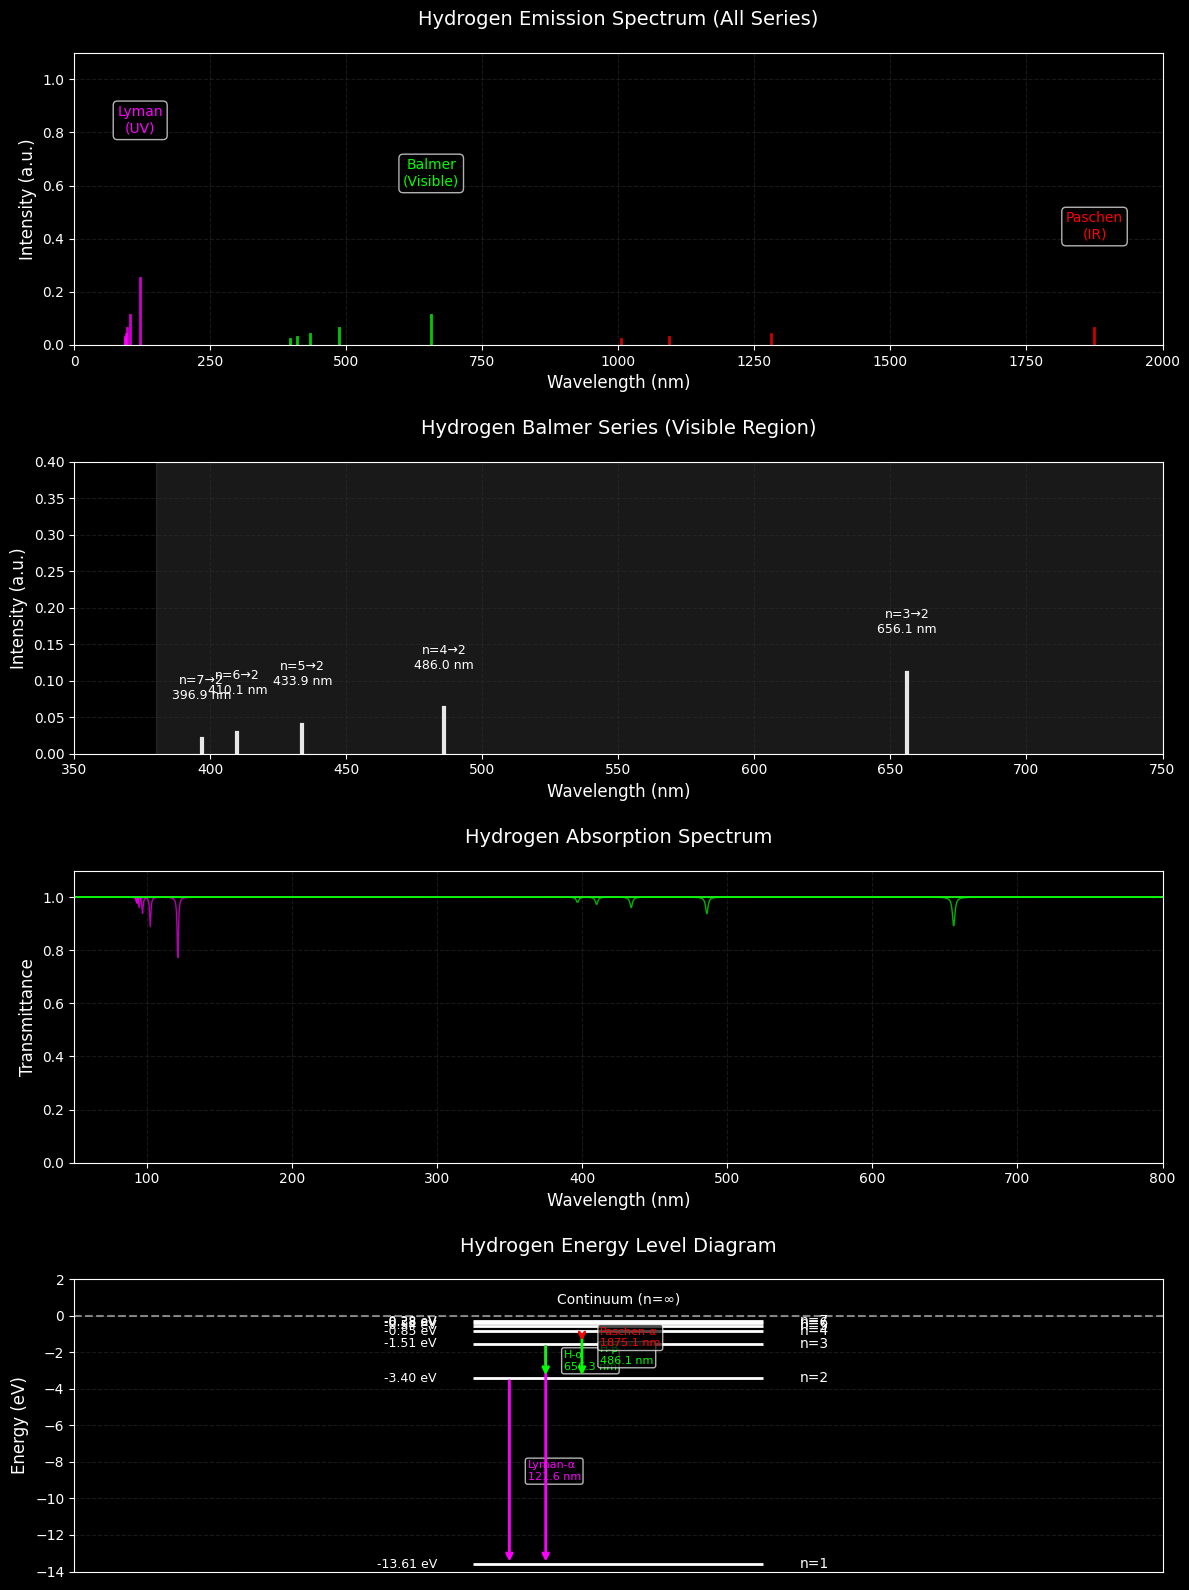


THEORETICAL BACKGROUND

The hydrogen atom energy levels are given by:
  E_n = -13.6 eV / n²

Transition wavelength formula:
  1/λ = R_H * (1/n₁² - 1/n₂²)
  where R_H = 1.097×10⁷ m⁻¹ (Rydberg constant)

Selection rules for electric dipole transitions:
  Δl = ±1 (orbital angular momentum)
  Δs = 0 (spin)

Note: This calculation uses the exact analytical solution
for hydrogen. No approximations needed!


In [10]:
# Hydrogen Atomic Spectrum Calculation

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, e, m_e, epsilon_0
import scipy

# Constants
h_ev = 4.135667696e-15  # Planck constant in eV·s
c_nm = 299792458e9      # Speed of light in nm/s
ev_to_nm = h_ev * c_nm  # Conversion factor from eV to nm
Ry = 13.605693122994   # Rydberg constant in eV

# Analytical solution for hydrogen energy levels
def hydrogen_energy(n):
    """Calculate energy of hydrogen atom in state n (in eV)"""
    return -Ry / n**2

# Calculate wavelength for transition from n_upper to n_lower
def transition_wavelength(n_upper, n_lower):
    """Calculate wavelength (nm) for transition between levels"""
    E_upper = hydrogen_energy(n_upper)
    E_lower = hydrogen_energy(n_lower)
    delta_E = E_upper - E_lower  # Energy difference in eV
    wavelength = ev_to_nm / abs(delta_E)
    return wavelength, abs(delta_E)

print("="*60)
print("HYDROGEN ATOMIC SPECTRUM CALCULATION")
print("="*60)

# Step 1: Calculate energy levels
print("\n1. Energy Levels of Hydrogen")
print("Level | n | Energy (eV)")
print("-" * 30)
energy_levels = {}
for n in range(1, 8):
    E_n = hydrogen_energy(n)
    energy_levels[n] = E_n
    print(f"  {n}   | {n} | {E_n:8.3f}")

# Step 2: Calculate spectral series
print("\n2. Spectral Series Calculation")

# Define spectral series
series_data = {
    'Lyman': {'n_lower': 1, 'n_upper_range': range(2, 8), 'color': '#ff00ff'},    # UV
    'Balmer': {'n_lower': 2, 'n_upper_range': range(3, 8), 'color': '#00ff00'},   # Visible
    'Paschen': {'n_lower': 3, 'n_upper_range': range(4, 8), 'color': '#ff0000'},  # IR
    'Brackett': {'n_lower': 4, 'n_upper_range': range(5, 8), 'color': '#ffaa00'}, # IR
    'Pfund': {'n_lower': 5, 'n_upper_range': range(6, 8), 'color': '#00aaff'}     # IR
}

all_transitions = []

for series_name, series_info in series_data.items():
    print(f"\n{series_name} Series (n_lower = {series_info['n_lower']}):")
    print("Transition | Wavelength (nm) | Energy (eV) | Region")
    print("-" * 55)

    for n_upper in series_info['n_upper_range']:
        wavelength, energy = transition_wavelength(n_upper, series_info['n_lower'])

        # Determine region
        if wavelength < 380:
            region = "UV"
        elif 380 <= wavelength <= 750:
            region = "Visible"
        else:
            region = "IR"

        transition = {
            'series': series_name,
            'n_upper': n_upper,
            'n_lower': series_info['n_lower'],
            'wavelength': wavelength,
            'energy': energy,
            'region': region,
            'color': series_info['color']
        }
        all_transitions.append(transition)

        print(f" {n_upper}→{series_info['n_lower']}      | {wavelength:10.1f}    | {energy:8.3f}   | {region}")

# Special lines
print("\n3. Notable Spectral Lines")
print("="*60)
print("Balmer Series (Visible):")
print("  H-α: 656.3 nm (red, n=3→2)")
print("  H-β: 486.1 nm (blue-green, n=4→2)")
print("  H-γ: 434.0 nm (blue, n=5→2)")
print("  H-δ: 410.2 nm (violet, n=6→2)")

print("\nLyman Series (UV):")
print("  Lyman-α: 121.6 nm (n=2→1)")
print("  Lyman limit: 91.2 nm (n=∞→1)")

# Step 4: Create spectra plots
BASELINE_COLOR = '#404040'
GRID_COLOR = '#303030'

plt.figure(figsize=(12, 16), facecolor='black')
plt.style.use('dark_background')

# Emission Spectrum (all series)
plt.subplot(4, 1, 1)
for trans in all_transitions:
    if trans['wavelength'] < 2000:  # Limit to reasonable range
        intensity = 1.0 / trans['n_upper']**2  # Intensity decreases with n
        plt.plot([trans['wavelength'], trans['wavelength']], [0, intensity],
                color=trans['color'], linewidth=2, alpha=0.8)

plt.xlabel('Wavelength (nm)', color='white', fontsize=12)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=12)
plt.title('Hydrogen Emission Spectrum (All Series)', color='white', pad=20, fontsize=14)
plt.xlim(0, 2000)
plt.ylim(0, 1.1)
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)

# Add series labels
series_labels = {
    'Lyman': (121.6, 0.8, 'Lyman\n(UV)'),
    'Balmer': (656.3, 0.6, 'Balmer\n(Visible)'),
    'Paschen': (1875.1, 0.4, 'Paschen\n(IR)')
}
for series, (x, y, label) in series_labels.items():
    color = series_data[series]['color']
    plt.text(x, y, label, color=color, fontsize=10, ha='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

# Balmer Series (Visible) - Detailed
plt.subplot(4, 1, 2)
balmer_transitions = [t for t in all_transitions if t['series'] == 'Balmer' and t['wavelength'] < 800]
for trans in balmer_transitions:
    intensity = 1.0 / trans['n_upper']**2
    plt.plot([trans['wavelength'], trans['wavelength']], [0, intensity],
            color='white', linewidth=3, alpha=0.9)
    plt.text(trans['wavelength'], intensity + 0.05, f"n={trans['n_upper']}→2\n{trans['wavelength']:.1f} nm",
            ha='center', va='bottom', color='white', fontsize=9)

plt.xlabel('Wavelength (nm)', color='white', fontsize=12)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=12)
plt.title('Hydrogen Balmer Series (Visible Region)', color='white', pad=20, fontsize=14)
plt.xlim(350, 750)
plt.ylim(0, 0.4)
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)

# Add visible spectrum background
visible_spectrum = plt.axvspan(380, 750, alpha=0.1, color='white')

# Absorption Spectrum
plt.subplot(4, 1, 3)
wavelength_range = np.linspace(50, 800, 2000)
baseline = np.ones_like(wavelength_range)
plt.plot(wavelength_range, baseline, color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines (using Lorentzian profiles)
for trans in all_transitions:
    if trans['wavelength'] < 800:
        intensity = 1.0 / trans['n_upper']**2
        gamma = 0.5 if trans['series'] == 'Lyman' else 1.0  # Line width
        profile = 1 - intensity * gamma**2 / ((wavelength_range - trans['wavelength'])**2 + gamma**2)
        plt.plot(wavelength_range, profile, color=trans['color'], alpha=0.7, linewidth=1)

plt.xlabel('Wavelength (nm)', color='white', fontsize=12)
plt.ylabel('Transmittance', color='white', fontsize=12)
plt.title('Hydrogen Absorption Spectrum', color='white', pad=20, fontsize=14)
plt.xlim(50, 800)
plt.ylim(0, 1.1)
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)

# Energy Level Diagram
plt.subplot(4, 1, 4)
# Plot energy levels
n_max = 7
level_width = 0.8
x_center = 0

for n in range(1, n_max + 1):
    E_n = hydrogen_energy(n)
    plt.hlines(E_n, x_center - level_width/2, x_center + level_width/2,
              colors='white', linewidth=2)
    plt.text(x_center + level_width/2 + 0.1, E_n, f'n={n}',
            ha='left', va='center', color='white', fontsize=10)
    plt.text(x_center - level_width/2 - 0.1, E_n, f'{E_n:.2f} eV',
            ha='right', va='center', color='white', fontsize=9)

# Draw some transitions
transitions_to_draw = [
    # Lyman series (to n=1)
    (2, 1, '#ff00ff', 'Lyman-α\n121.6 nm'),
    (3, 1, '#ff00ff', None),
    # Balmer series (to n=2)
    (3, 2, '#00ff00', 'H-α\n656.3 nm'),
    (4, 2, '#00ff00', 'H-β\n486.1 nm'),
    # Paschen series (to n=3)
    (4, 3, '#ff0000', 'Paschen-α\n1875.1 nm'),
]

for n_upper, n_lower, color, label in transitions_to_draw:
    E_upper = hydrogen_energy(n_upper)
    E_lower = hydrogen_energy(n_lower)

    # Draw arrow
    arrow_x = x_center - 0.3 + 0.1 * (n_upper - 2)
    plt.annotate('', xy=(arrow_x, E_lower), xytext=(arrow_x, E_upper),
                arrowprops=dict(arrowstyle='->', color=color, lw=2))

    # Add label if provided
    if label:
        plt.text(arrow_x + 0.05, (E_upper + E_lower)/2, label,
                ha='left', va='center', color=color, fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))

# Add continuum
plt.axhline(y=0, color='white', linestyle='--', alpha=0.5)
plt.text(0, 0.5, 'Continuum (n=∞)', ha='center', va='bottom', color='white', fontsize=10)

plt.ylabel('Energy (eV)', color='white', fontsize=12)
plt.title('Hydrogen Energy Level Diagram', color='white', pad=20, fontsize=14)
plt.xlim(-1.5, 1.5)
plt.ylim(-14, 2)
plt.grid(True, axis='y', color=GRID_COLOR, linestyle='--', alpha=0.5)
plt.gca().set_xticks([])

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.gcf().patch.set_facecolor('black')
plt.show()

# Print theoretical background
print("\n" + "="*60)
print("THEORETICAL BACKGROUND")
print("="*60)
print("\nThe hydrogen atom energy levels are given by:")
print("  E_n = -13.6 eV / n²")
print("\nTransition wavelength formula:")
print("  1/λ = R_H * (1/n₁² - 1/n₂²)")
print("  where R_H = 1.097×10⁷ m⁻¹ (Rydberg constant)")
print("\nSelection rules for electric dipole transitions:")
print("  Δl = ±1 (orbital angular momentum)")
print("  Δs = 0 (spin)")

print("\nNote: This calculation uses the exact analytical solution")
print("for hydrogen. No approximations needed!")

**Exact Solutions**: For hydrogen, we can use the exact energy formula E_n = -13.6 eV / n², rather than computational methods like DFT/TD-DFT.

**Multiple Spectral Series**: The code calculates all the major hydrogen spectral series:
- **Lyman series** (UV): Transitions to n=1
- **Balmer series** (Visible): Transitions to n=2
- **Paschen series** (IR): Transitions to n=3
- **Brackett series** (IR): Transitions to n=4
- **Pfund series** (IR): Transitions to n=5

**Famous Lines**: The code identifies the well-known spectral lines:
- H-α (656.3 nm, red)
- H-β (486.1 nm, blue-green)
- H-γ (434.0 nm, blue)
- H-δ (410.2 nm, violet)
- Lyman-α (121.6 nm, UV)

**Visualization**
- Full emission spectrum showing all series
- Detailed Balmer series (visible region)
- Absorption spectrum
- Energy level diagram with transitions


For hydrogen, the electronic transitions between energy levels are well-known. The corresponding emission and absorption spectra can be calculated using the Rydberg formula:

$
\frac{1}{\lambda} = R_H \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right)
$

Where:
- $ \lambda $ is the wavelength of the transition.
- $ R_H $ is the Rydberg constant for hydrogen, $ R_H = 1.097 \times 10^7 \, \text{m}^{-1} $.
- $ n_1 $ and $ n_2 $ are the principal quantum numbers of the lower and higher energy levels, respectively, with $ n_2 > n_1 $.

For hydrogen, the transitions typically seen in the visible spectrum come from the Balmer series ($ n_1 = 2 $).


- **Rydberg Formula:** This formula calculates the wavelength of light emitted or absorbed when an electron transitions between energy levels.
- **Balmer Series:** We focus on transitions where the electron ends up at $ n_1 = 2 $ (visible light region). These include $ n_2 = 3, 4, 5, 6 $, which correspond to specific emission and absorption lines in the visible range.
- **Wavelengths:** We calculate the wavelengths of the transitions and plot the emission (peaks) and absorption (dips) spectra.

**Output:**
- **Emission Spectrum:** Shows peaks at specific wavelengths corresponding to hydrogen’s visible spectral lines.
- **Absorption Spectrum:** Shows dips at the same wavelengths, corresponding to the absorption of photons at those energies.
- **Wavelengths:** These are the wavelengths corresponding to the visible Balmer series transitions.

For hydrogen's Balmer series, the most important lines are around:

- $ n_2 = 3 \rightarrow n_1 = 2 $: 656.3 nm (H-alpha)
- $ n_2 = 4 \rightarrow n_1 = 2 $: 486.1 nm (H-beta)
- $ n_2 = 5 \rightarrow n_1 = 2 $: 434.0 nm (H-gamma)
- $ n_2 = 6 \rightarrow n_1 = 2 $: 410.2 nm (H-delta)